# Correlation and Regression

Given pairs of measurements we may want to determine whether there is any relationship between them. e.g. If we know the ages and heights of a sample of children, we might want to know if older children are generally taller than younger children, or are age and height unrelated? 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [86]:
# data from https://www.kaggle.com/datasets/camnugent/california-housing-prices
df = pd.read_csv('housing.csv')

In [87]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Correlation

The most common measurement of correlation is called Pearson's coefficient. The value ranges from -1 to +1, with 0 indicating that the two measurements are completely unrelated in this sample. 

This correlation coefficient considers whether the relationship between the data can be well described using a straight line. If one value increases by a fixed amount then should we expect the other value also increase by a fixed amount? It is most appropriate to use the correlation coefficient on two variables which are continuous and thought to be normally distributed. 

In [10]:
df.corr()
# df.corr(method='spearman')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [11]:
df.corr().style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

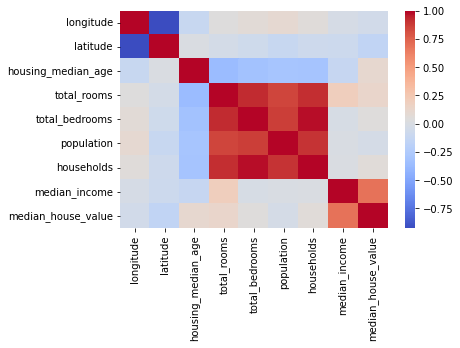

In [12]:
sns.heatmap(df.corr(), cmap="coolwarm")

### Significance

Is the reported correlation likely to have occurred by chance? Use scipy to check with paired series of data, find the pearson's correlation coefficient and the p-value. The p-value is interpreted as the probability that the observed correlation could have occurred by chance by sampling from non-correlated data. 

With very large data sets it is pretty easy to get statistical significance by this method, in my opinion it's more useful on smaller samples of around a few hundred data points. 

It is a separate question whether the amount of correlation observed is interesting. Statistical significance just says it's unlikely that this sample came from completely random data. The value of the correlation coefficient says how strongly Y depends on X.  

In [13]:
import scipy

scipy.stats.pearsonr(df['median_house_value'], df['median_income'])

(0.6880752079585478, 0.0)

In [14]:
scipy.stats.pearsonr(df['total_rooms'], df['total_bedrooms'])

ValueError: array must not contain infs or NaNs

In [15]:
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [16]:
df_no_nan = df.dropna()

In [17]:
scipy.stats.pearsonr(df_no_nan['total_rooms'], df_no_nan['total_bedrooms'])

(0.9303795046865077, 0.0)

In [18]:
scipy.stats.pearsonr(df_no_nan['housing_median_age'], df_no_nan['latitude'])

(0.011899066824498292, 0.08896986250900428)

### Incuding non-numeric values in correlation

In [19]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [20]:
for i, row in df.iterrows():
    rank = 0
    if row['ocean_proximity'] == "INLAND":
        rank = 1
    elif row['ocean_proximity'] == "<1H OCEAN":
        rank = 2
    elif row['ocean_proximity'] == "NEAR BAY":
        rank = 3
    elif row['ocean_proximity'] == "NEAR OCEAN":
        rank = 4
    elif row['ocean_proximity'] == "ISLAND":
        rank = 5
    df.loc[i,'ocean_ranking'] = rank


In [21]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_ranking
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.0


<AxesSubplot:>

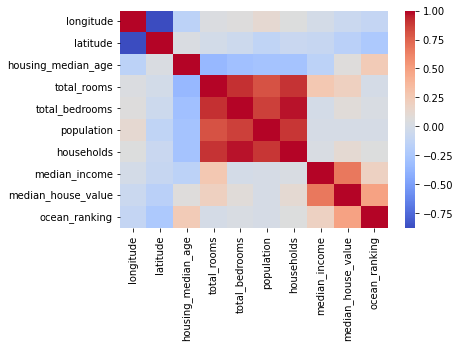

In [22]:
sns.heatmap(df.corr(method='spearman'), cmap="coolwarm")

Don't use pearsons (standard) correlation with non continuous data. Rank correlations (either Spearman's or Kendall's) are able to identify correlation also when the relationship is non linear (but still monotonic). Rank correlation can be used with categories of data that are clearly ordered, pearsons should not be used in this case. Could possibly apply in this case but 5 categories isn't many and also are they really in a clear order? Rank correlations also more robust to outliers. If your data doesn't have inherent order -- as is arguably the case with the ocean proximity -- you cannot use correlation statistics to understand it!! If you assign numbers to the categories then the correlations can be calculated but they will be meaningless. Please don't do this!

In [23]:
df = df.drop('ocean_proximity', axis=1)

## Simple visualisation of location vs house value

We can observe a strong correlation between the latitude and longitude in our data. Is that interesting? How can we explain it? 

Relationship between location data and some other variable is often best understood visually. 

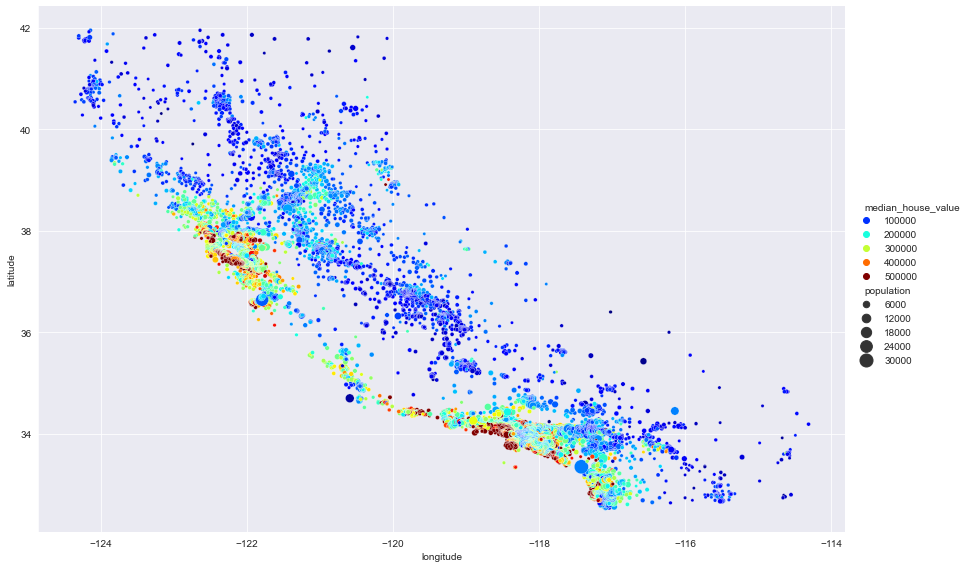

In [24]:
sns.set_style(style="darkgrid", rc=None)
g = sns.relplot(
    kind='scatter',
    data=df,
    x="longitude", 
    y="latitude",
    hue="median_house_value", 
    size="population",
    palette=plt.get_cmap('jet'), 
    sizes=(10, 200), 
    height=8, 
    aspect=1.5
)

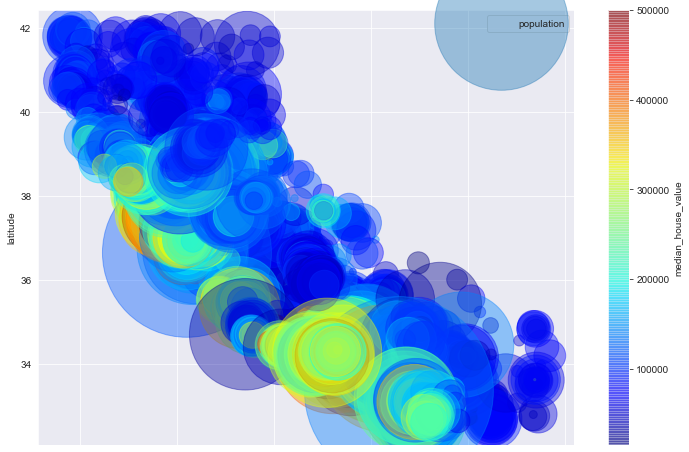

In [25]:
df.plot(
    kind='scatter',
    x='longitude', 
    y='latitude', 
    alpha=0.4, 
    s=df['population'], 
    label='population',
    figsize=(12, 8), 
    c='median_house_value', 
    cmap=plt.get_cmap('jet'), 
    colorbar=True
)
plt.legend()
plt.show()

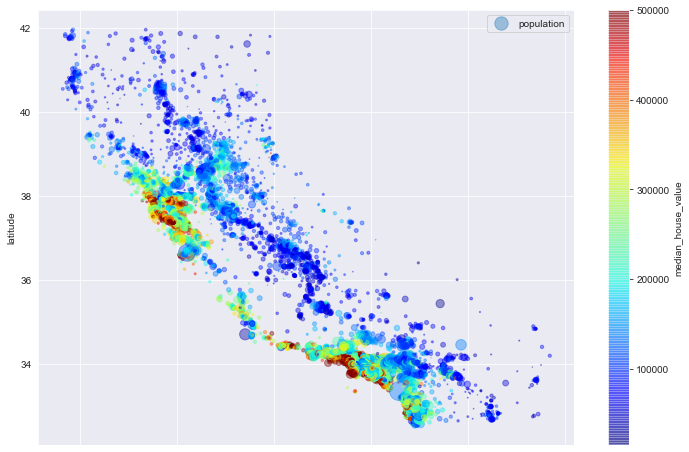

In [26]:
df.plot(
    kind='scatter',
    x='longitude', 
    y='latitude', 
    alpha=0.4, 
    s=df['population']/100, 
    label='population',
    figsize=(12, 8), 
    c='median_house_value', 
    cmap=plt.get_cmap('jet'), 
    colorbar=True
)
plt.legend()
plt.show()

## Exploring data with lots of scatter plots

Instead of calculating coefficients we can get a quick idea of like correlation between different variables by drawing lots of scatter plots. This kind of visual inspection is often really useful early in an analysis. 

In [27]:
df['density'] = df['population']/df['total_rooms']

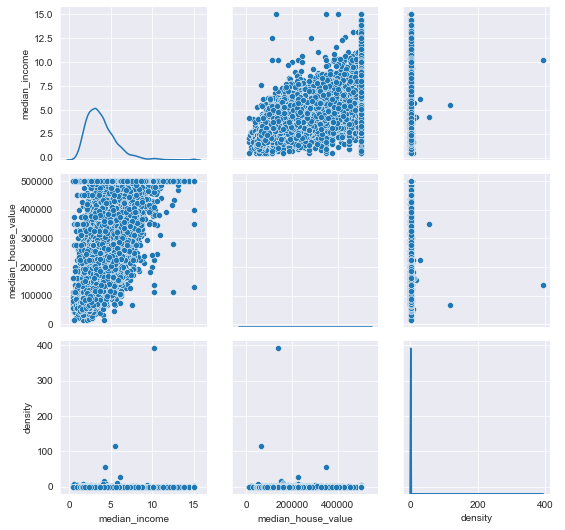

In [28]:
g = sns.PairGrid(df[['median_income', 'median_house_value', 'density']])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

There are some very odd features revealed in these plots which were not obvious before! We should investigate these problems further and clean up the data, then we can redo any calculations on a less noisy dataset. 

In [29]:
df['density'].max()

392.63157894736844

In [30]:
family_size = df['population']/df['households']

In [31]:
family_size

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Length: 20640, dtype: float64

In [32]:
df['family_size'] = family_size

In [33]:
df[df['density'] > 5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_ranking,density,family_size
3364,-120.51,40.41,36.0,36.0,8.0,4198.0,7.0,5.5179,67500.0,1.0,116.611111,599.714286
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,2.0,5.223301,12.396313
8874,-118.45,34.06,52.0,204.0,34.0,1154.0,28.0,9.3370,500001.0,2.0,5.656863,41.214286
9172,-118.59,34.47,5.0,538.0,98.0,8733.0,105.0,4.2391,154600.0,1.0,16.232342,83.171429
12104,-117.33,33.97,8.0,152.0,19.0,1275.0,20.0,1.6250,162500.0,1.0,8.388158,63.750000
13034,-121.15,38.69,52.0,240.0,44.0,6675.0,29.0,6.1359,225000.0,1.0,27.812500,230.172414
13366,-117.63,33.94,36.0,447.0,95.0,2886.0,85.0,4.2578,183300.0,1.0,6.456376,33.952941
15790,-122.40,37.77,52.0,144.0,63.0,1061.0,68.0,4.3958,225000.0,3.0,7.368056,15.602941
16420,-121.29,37.89,26.0,161.0,27.0,1542.0,30.0,5.7485,162500.0,1.0,9.577640,51.400000
16643,-120.65,35.32,20.0,626.0,212.0,3574.0,261.0,1.0298,300000.0,4.0,5.709265,13.693487


In [ ]:
# sns.scatterplot(data=df, x='median_income', y='median_house_value')

In [ ]:
# df.plot(
#     kind='scatter',
#     x='median_income', 
#     y='median_house_value'
# )

### Plotting a regression line

If the two data series seem like they are related and the relationship can be described by a straight line then we can plot a best fit line using linear regression. 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

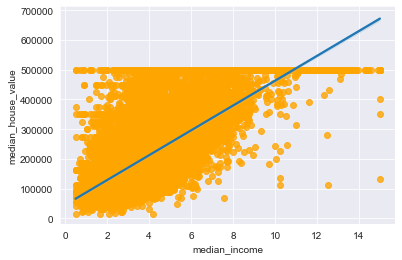

In [34]:
sns.regplot(
    data=df, 
    x='median_income', 
    y='median_house_value', 
    scatter_kws={"color": "orange"}
)

In [ ]:
df[df['median_house_value'] > 500000]

We could check whether the practice of not recording values over half a million has affected the best fit line by excluding these data points. 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

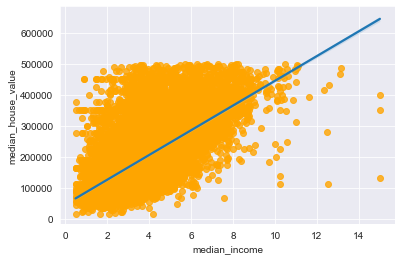

In [35]:
sns.regplot(
    data=df[df['median_house_value'] < 500000], 
    x='median_income', 
    y='median_house_value', 
    scatter_kws={"color": "orange"}
)

## Linear vs logistic regression

The iris dataset has measurements of different flowers together with labels indicating the species of iris flower the measurements came from. We will look for a relationship between the measurements and species. 

In [36]:
iris = sns.load_dataset("iris")

In [37]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


To begin with we'll simplify by just looking at two of the species. 

In [38]:
iris_2 = iris[iris['species']!='virginica'] 

We want to use linear regression to draw a line that summarises the relationship, as we did before. 

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

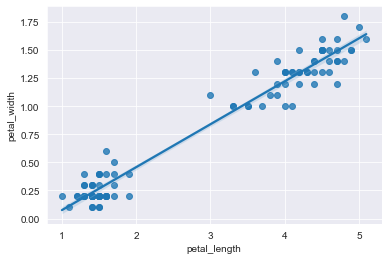

In [39]:
sns.regplot(data=iris_2, x='petal_length', y='petal_width')

<AxesSubplot:xlabel='petal_length', ylabel='species'>

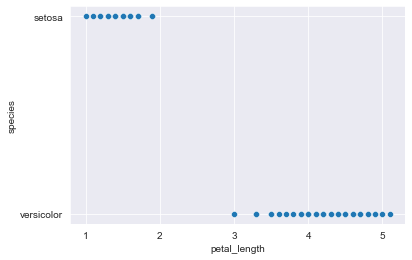

In [40]:
sns.scatterplot(data=iris_2, x='petal_length', y='species')

TypeError: can't multiply sequence by non-int of type 'float'

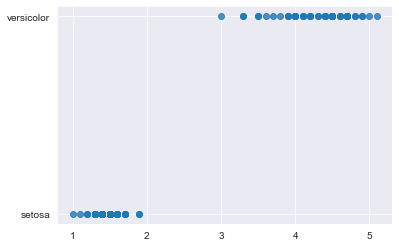

In [41]:
sns.regplot(data=iris_2, x='petal_length', y='species')

It can't fit a regression line because one of the data types is not numeric. Let's fix that.

In [42]:
for i, row in iris.iterrows():
    if row.species == 'versicolor':
        iris.loc[i, 's'] = 1
    else:
        iris.loc[i, 's'] = 0

In [43]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,s
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,0.0
2,4.7,3.2,1.3,0.2,setosa,0.0
3,4.6,3.1,1.5,0.2,setosa,0.0
4,5.0,3.6,1.4,0.2,setosa,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0
146,6.3,2.5,5.0,1.9,virginica,0.0
147,6.5,3.0,5.2,2.0,virginica,0.0
148,6.2,3.4,5.4,2.3,virginica,0.0


In [44]:
iris_2 = iris[iris['species']!='virginica'] 

Now we've represented the species as a number we can draw a regression line. But is this the best way to explain the relationship between petal length and species? 

<AxesSubplot:xlabel='petal_length', ylabel='s'>

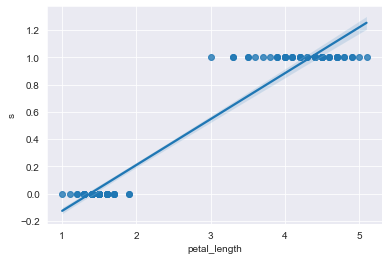

In [45]:
sns.regplot(data=iris_2, x='petal_length', y='s')

Usually with a regression line we want to use it where one value is known and we look at the line to estimate the other value. So here we could say if a petal length of 3 is observed, the value for the species is expected to be around 0.55. What does 0.55 mean? Not really anything, because the species value isn't continuous. We can't have a flower which is halfway between the two. Instead, we want to know how likely is it that a petal length of 3 means we have a setosa or versicolor flower. This is better achieved with logistic regression, which is a method for classification. 

In [46]:
from sklearn.model_selection import train_test_split
import numpy as np

In [47]:
X = np.array(iris_2['petal_length']).reshape(-1, 1)
y = iris_2['species']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.5)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

We've split the data into a train and test set to be able to check how good the classification is. Scikitlearn provides a method to calculate the logistic regression model from the paired training data, which we've done. Now we can use the model to make predictions on the remaining data. Given a measurement of petal length, which species should we say that this is? 

In [50]:
prediction = logreg.predict(X_test)

In [ ]:
X_test.shape

In [51]:
prediction

array(['setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa'], dtype=object)

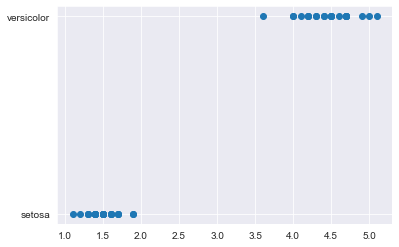

In [52]:
plt.scatter(X_test, prediction)

The plot shows the predictions that the model made on the testing data. Now we can check if it was correct. 

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        26
  versicolor       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



This was a really simple example and we could perfectly classify the test set! We can use more inputs to see how the model classifies flowers based on the different peral lengths.

In [54]:
x_values = np.linspace(1,5,500)
x_values.shape

(500,)

In [55]:
x_values = x_values.reshape(-1, 1)

In [ ]:
x_values.shape

In [56]:
prediction = logreg.predict(x_values)

In [ ]:
prediction.shape

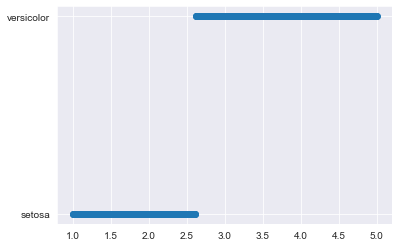

In [57]:
plt.scatter(x_values, prediction)

Behind the classification decision there is a value for each possible input specifying the probability that the model assigns to that value belonging to the setosa or versicolor species. We can also plot this out.

In [58]:
predict_probs = logreg.predict_proba(x_values)[:,1]

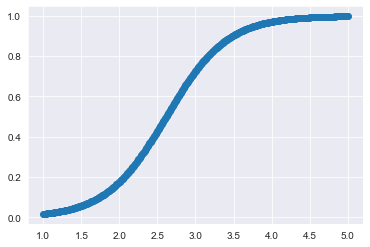

In [59]:
plt.scatter(x_values, predict_probs)

Logistic regression is simplest to understand in the 2 class case, but it can also be used for more classes. For each class it calculates a probability of a measurement indicating membership of that class. In combination, these probabilities allow the model to make a prediction. 

In [70]:
iris = sns.load_dataset("iris")
X = np.array(iris['petal_length']).reshape(-1, 1)
y = iris['species']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.5)

In [71]:
model = LogisticRegression().fit(X_train, y_train)

In [72]:
print(model.predict(X_test))

['virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa'
 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa'
 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica'
 'setosa' 'virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'versicolor']


In [73]:
pred_correct = model.predict(X_test) == y_test

In [74]:
pred_correct.sum()

71

In [75]:
pred_correct.shape

(75,)

Again, we can plot the probabilities assigned to each measurement that it comes from each species. 

In [76]:
x_values = np.linspace(1,5,500)

In [77]:
predict_probs = model.predict_proba(x_values.reshape(-1,1))

In [78]:
predict_probs

array([[9.86183128e-01, 1.38167374e-02, 1.34779550e-07],
       [9.85919874e-01, 1.40799857e-02, 1.40628720e-07],
       [9.85651677e-01, 1.43481766e-02, 1.46730986e-07],
       ...,
       [2.37389006e-03, 4.50089475e-01, 5.47536635e-01],
       [2.29891659e-03, 4.44297762e-01, 5.53403322e-01],
       [2.22599987e-03, 4.38519290e-01, 5.59254710e-01]])

In [79]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

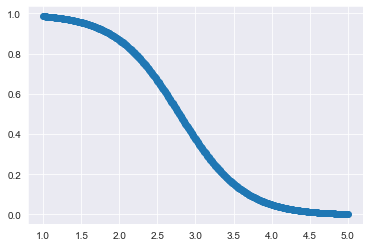

In [80]:
# probability of setosa
plt.scatter(x_values, predict_probs[:,0])

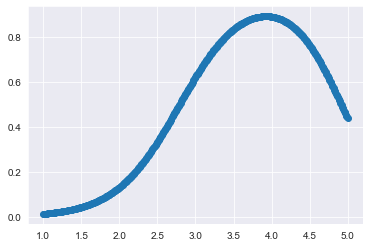

In [81]:
# probability of versicolor
plt.scatter(x_values, predict_probs[:,1])

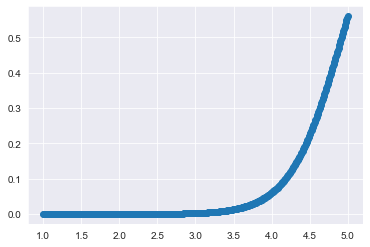

In [82]:
# probability of virginica
plt.scatter(x_values, predict_probs[:,2])